# Loan Default Project

### Problem Statement: 
#### Machine Learning algorithms in predicting which customers will default on their loans based on their financial information and historical data.

### Data Collection

### 1. Import the raw data

In [1]:
#import Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#import all the datasets

account = pd.read_table("project_datasets/account.asc",delimiter=";",engine='python')
card = pd.read_table("project_datasets/card.asc",delimiter=";",engine='python')
client = pd.read_table("project_datasets/client.asc",delimiter=";" ,engine='python')
disp = pd.read_table("project_datasets/disp.asc",delimiter=";",engine='python')
district = pd.read_table("project_datasets/district.asc",delimiter=";",engine='python')
loan = pd.read_table("project_datasets/loan.asc",delimiter=";",engine='python')
order = pd.read_table("project_datasets/order.asc",delimiter=";",engine='python')
trans = pd.read_table("project_datasets/trans.asc",delimiter=";",engine='python')

In [4]:
#Provide dataset columns headings

loan.columns = ['loan_id','account_id','loan_date','loan_ammount','loan_duration','loan_payment','loan_status']

account.columns = ['account_id','district_id','account_frequency','account_date']

order.columns = ['order_id','account_id','order_bank_to','order_account_to','Paid_loan_amount','order_k_symbol']

card.columns = ['card_id','disp_id','card_type','card_issued']

disp.columns = ['disp_id','client_id','account_id','disp_type']

client.columns = ['client_id','client_birth_date','district_id']

district.columns = ['district_id','district_name','district_region','no_of_inhabitants','no_of_inhabitants<499','no_of_inhabitants 500-1999','no_of_inhabitants 2000-9999','no_of_inhabitants>10000','district_no_of_cities','ration_of_urban_inhabitants','district_avg_salary','unemploymant_rate_95','unemploymant_rate_96','No.enterpreneurs/100inhabitans','no_of_commited_crime_95s','no_of_commited_crime_96s']

trans.columns = ['trans_id','account_id','trans_date','trans_type','trans_operation','trans_amount','trans_balance','trans_K_symbol','trans_bank','trans_account']


### 2. Explore the tables to familiarize yourself with the tables

# 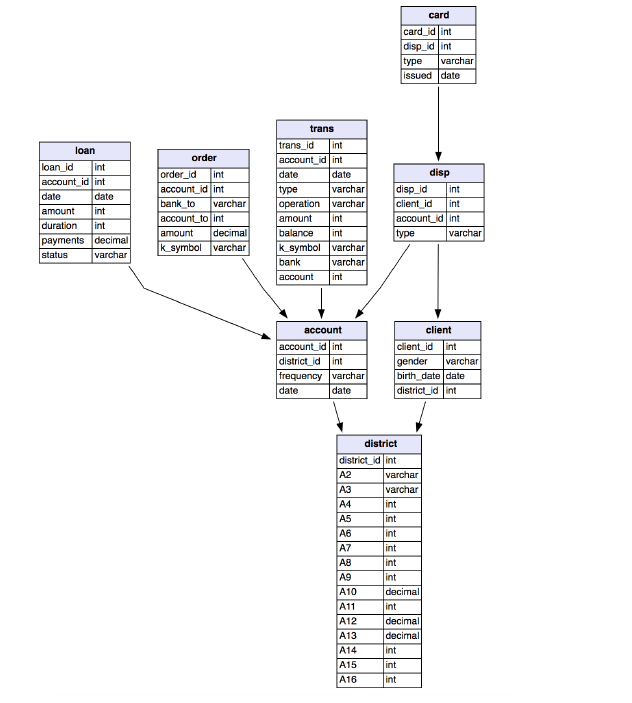

### 3. Run database queries to prepare modeling datasets

In [5]:
#combine loan account(L) and account table(A) based on account id
combine_LA = pd.merge(loan,account,how="inner",on="account_id")

#combine loan&Account Table(LA) and district table(D) based on district id
combine_LAD = pd.merge(combine_LA,district,how="inner",on="district_id")
#combine_LAD

In [6]:
# Order Table (O)
# we want to know the amount of loan payment done by client based on account id
# Here "UVER" in K-symbol coulum is stands for loan payment done by client
order1 = order['order_k_symbol'].isin((['UVER']))
order1 = order[order1]
order = order1[['account_id','Paid_loan_amount']]


#combine Order(debit) table with loan table to get the information of loan payments based on the account_id
# we are taking only Paid_loan_amount column to check - total loan payment done by client
combine_LADO = pd.merge(combine_LAD,order,how="inner",on="account_id")
#combine_LADO
#combine_LADO.to_csv('combine_lADO.csv')

In [7]:
# Disposition table(Di) "Disp" menas- they are not aligible to apply for loan
# we need the data that people applied for loan so we will remove the 'disp' category from 'disp_type'
disp = disp[disp.disp_type != 'DISPONENT']
#disp

# join card table(Ca) and Disposition table(Di) based on 'disp_id'
combine_DiCa = pd.merge(disp,card,how="inner",on="disp_id")
#combine_DiCa


#Now join 'combine_DiCa'(card & disp) table with the client table (Ci) based on 'client_id'
combine_DiCaCi = pd.merge(combine_DiCa,client,how="inner",on="client_id")
#combine_DiCaCi


#check csv - just to make sure its no duplication client_id in dataset
#combine_DiCaCi.to_csv('combine_DiCaCi.csv')
#Above 'combine_DiCaCi' table is combined table of 'client','Disp','Card'

In [9]:
# let's combine 'combine_LADO'(loan,account,district,order)table and 'combine_DiCaCi'(disp,card,client) tables

combine_LADODiCaCi = pd.merge(combine_LADO,combine_DiCaCi,how="left",on="account_id")
#combine_LADODiCaCi

In [11]:
#just to look difference between 2 district id is account and client from same or different district
#district_match = combine_lADODiCaCi[['district_id_x','district_id_y']]
#district_match.to_csv('district_match.csv')

#some client district and account district are different 
# mens we have to rename specific column with appropriate name
combine_LADODiCaCi = combine_LADODiCaCi.rename(columns={'district_id_x': 'Account__district' ,'district_id_y' : 'Client_district'})
#combine_lADODiCaCi

In [12]:
Loan_Default_Data = combine_LADODiCaCi
#Loan_Default_Data

In [14]:
#Save the data into CSV file
Loan_Default_Data.to_csv('C:/Users/pooja/OneDrive/Desktop/ML_Loan Default Prediction/Loan_Default_Data.csv')